In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку объёма 1000 из arcsine распределения

In [2]:
arcsine_rv = sts.arcsine()
sample = arcsine_rv.rvs(1000)

Гистограмма выборки и теоретическая плотность распределения поверх нее:

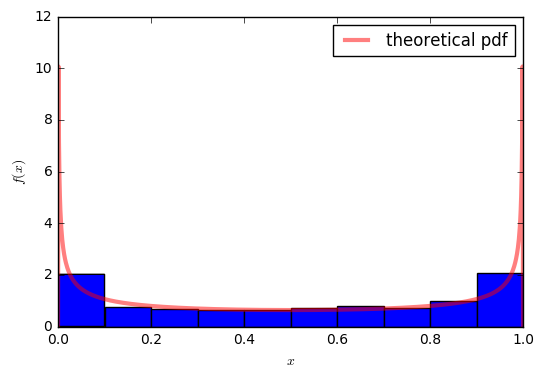

In [3]:
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,1,1000)
pdf = arcsine_rv.pdf(x)
plt.plot(x, pdf, 'r-', label='theoretical pdf', alpha=0.5, linewidth=3.0)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Функция, считающая 1000 выборочных средних для выборки размера n с мат. ожиданием mean и дисперсией variance

In [4]:
def histogram (n, mean, variance):
    # Генерируем 1000 выборочных средних
    mead_sample = [np.mean(arcsine_rv.rvs(n)) for i in range(1000)]
    
    # Строим нормальное распределение на основе значений дисперсии и мат. ожидания
    norm_rv = sts.norm(mean, np.sqrt(variance/n))

    # Строим гистограмму распределения выборочных средних    
    plt.hist(mead_sample, bins=25, normed=True)

    # На том же графике строим график плотности нормального распределения
    x = np.linspace(0,1,1000)
    pdf = norm_rv.pdf(x) # плотность
    plt.plot(x, pdf, 'r-', label='theoretical pdf', alpha=0.5, linewidth=3.0)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')

In [5]:
variance = 1./8. # Дисперсия арксинусного распределения из википедии
mean = 0.5 # Мат ожидание арксинусного распределения из википедии

Создаем выборку из 1000 выборочных средних выборок объёма 5 arcsine непрерывного случайного распределения

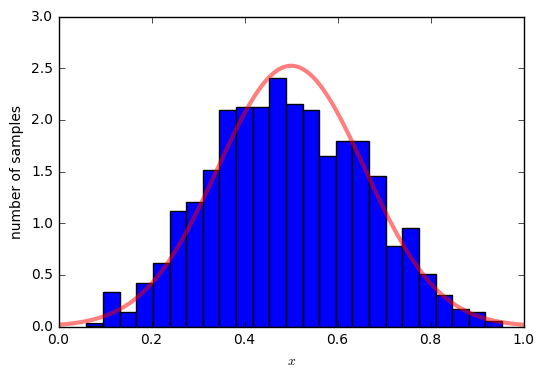

In [6]:
histogram (5, mean, variance)

Создаем выборку из 1000 выборочных средних выборок объёма 10 arcsine непрерывного случайного распределения

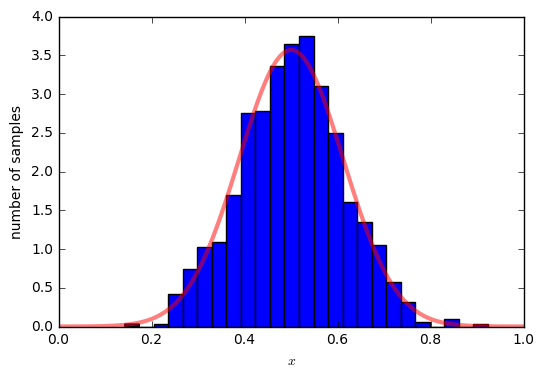

In [7]:
histogram (10, mean, variance)

Создаем выборку из 1000 выборочных средних выборок объёма 50 arcsine непрерывного случайного распределения

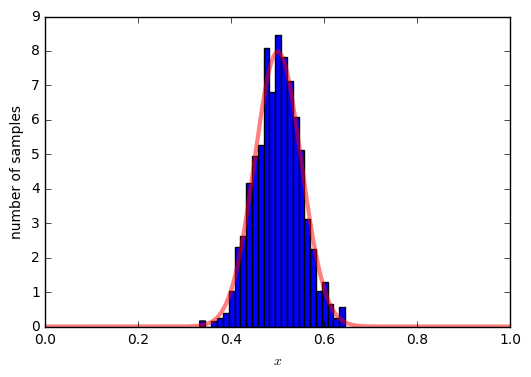

In [8]:
histogram (50, mean, variance)

По гистограммам распределения выборочных средних для выборок размером 5, 10 и 50, а также по графикам плотности нормальных распределений, с параметрами, подобранными с помощью Центральной предельнй теоремы наглядно видно, что распределения выборочных средних достаточно хорошо аппроксимируется нормальным распределением. Также по графикам видно, что с увеличением размера выборки гистограмма распределения все больше сглаживается и стремится к графику нормального распределения. Значения выборочных средних сходятся к мат. ожиданию с увеличением размеров выборок.